In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heartDiseaseDF = pd.read_csv("Resources/HEART_DISEASE2014.csv")
heartDiseaseDF.head(2)

,STATE,RATE,DEATHS,URL
0,AL,224.0,12461,/nchs/pressroom/states/alabama/alabama.htm
1,AK,146.6,782,/nchs/pressroom/states/alaska/alaska.htm


In [3]:
heartDiseaseDF.count()

STATE     50
RATE      50
DEATHS    50
URL       50
dtype: int64

In [4]:
heartDiseaseDF = heartDiseaseDF.dropna()
heartDiseaseDF.count()

STATE     50
RATE      50
DEATHS    50
URL       50
dtype: int64

In [5]:
states = heartDiseaseDF['STATE'].unique()
states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

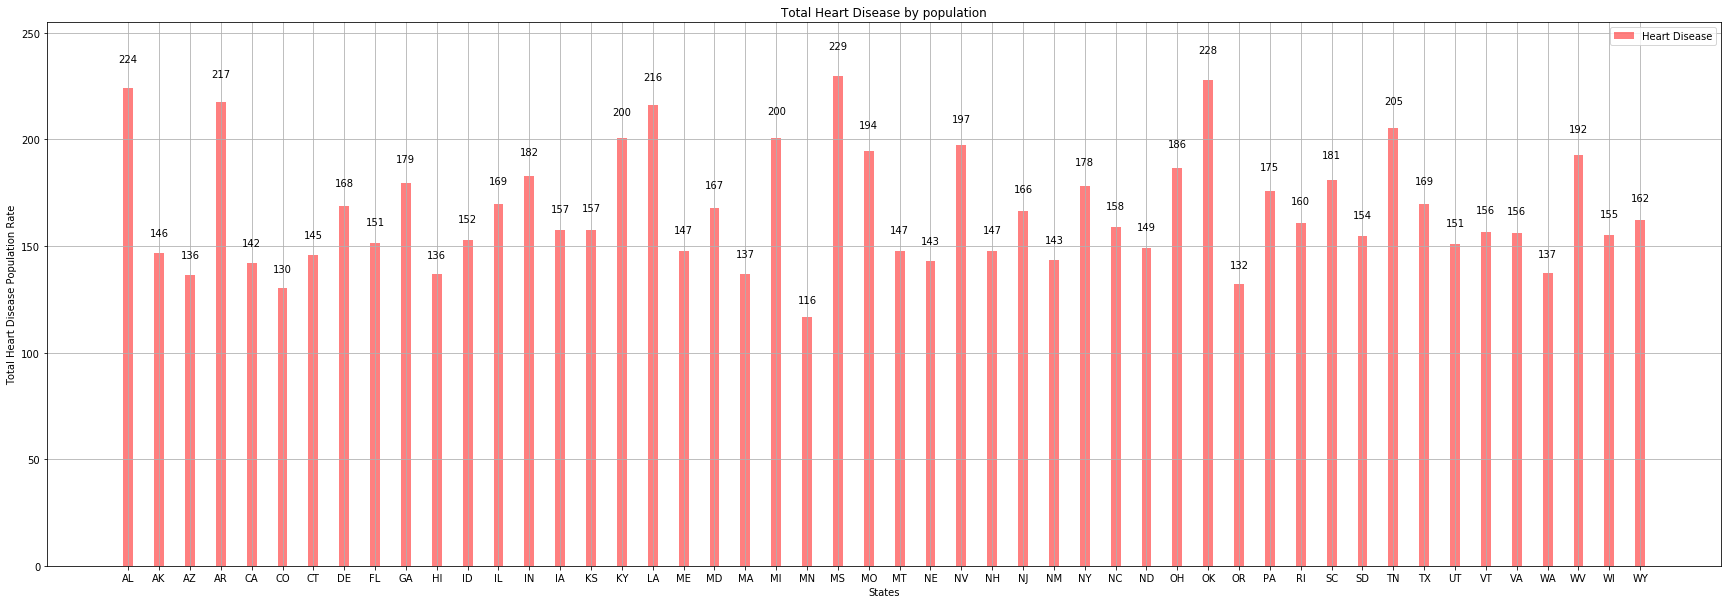

In [34]:
'''
  We want to population rate against every state suffering from HD.
        Perform a GROUP BY to group all the States.
'''

totalHDByState = heartDiseaseDF['RATE']
totalDeathsByState = heartDiseaseDF['DEATHS']

#Construct a Bar chart to indicate the HD% suffered by total of every state
x_axis = np.arange(len(states)) * 2.5
tick_locations = [value+0.4 for value in x_axis]
width = 0.8

fig1, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x_axis, totalHDByState, width, color='r', alpha=0.5, align='edge')

ax.set_ylabel('Total Heart Disease Population Rate')
ax.set_xlabel("States")
ax.legend(['Heart Disease', 'Deaths'])
ax.set_title("Total Heart Disease by population")
ax.set_xticks(x_axis+width/2)
ax.set_xticklabels(states)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.05 * height, '%d' %int(height), ha='center', va='bottom')
    
autolabel(rects1)
plt.savefig('Images/HDPopulation.png')
plt.ylim(0, 255)
plt.grid()
plt.show()

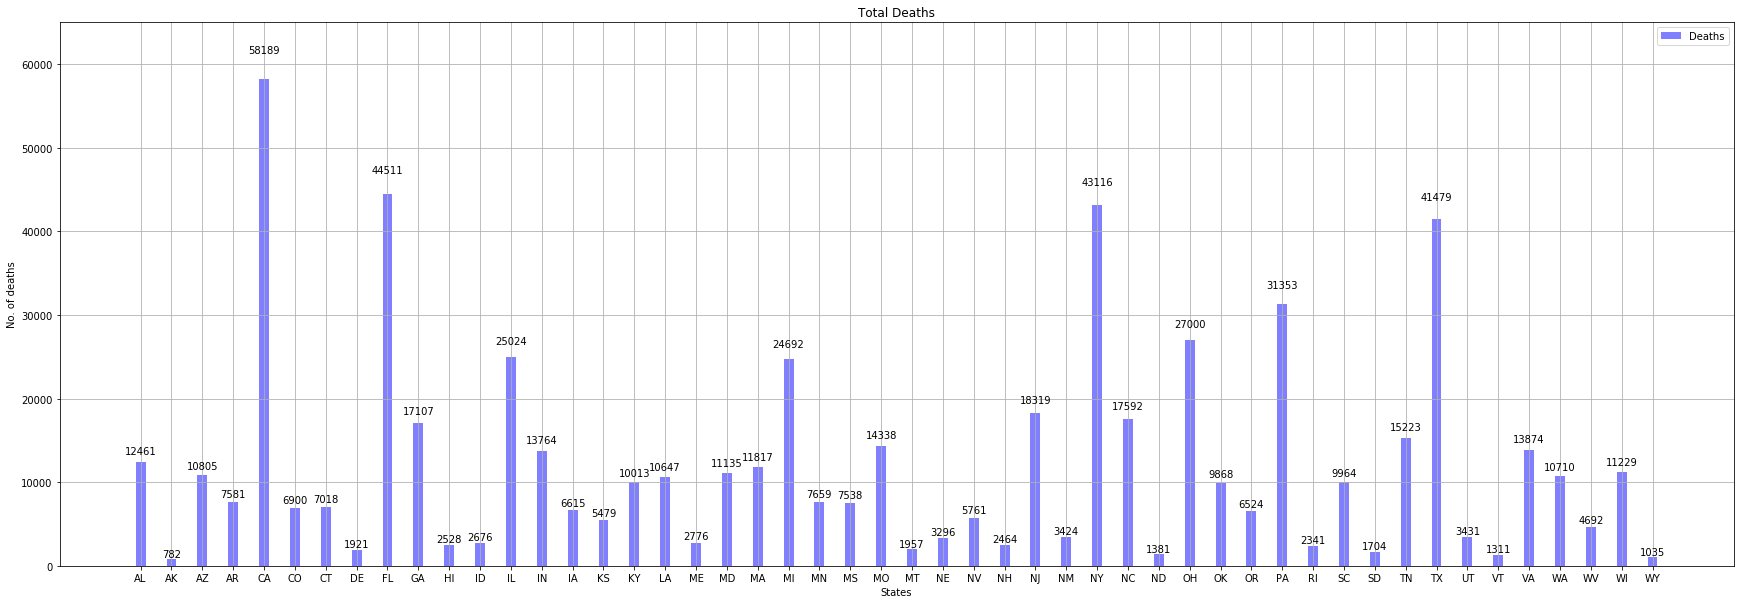

In [35]:
'''
  We want to population rate against every state suffering from HD.
        Perform a GROUP BY to group all the States.
'''

totalDeathsByState = heartDiseaseDF['DEATHS']

#Construct a Bar chart to indicate the HD% suffered by total of every state
x_axis = np.arange(len(states)) * 2.5
tick_locations = [value+0.4 for value in x_axis]
width = 0.8

fig2, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x_axis, totalDeathsByState, width, color='b', alpha=0.5, align='edge')

ax.set_ylabel('No. of deaths')
ax.set_xlabel("States")
ax.legend(['Deaths'])
ax.set_title("Total Deaths")
ax.set_xticks(x_axis+width/2)
ax.set_xticklabels(states)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.05 * height, '%d' %int(height), ha='center', va='bottom')
    
autolabel(rects1)
plt.savefig('Images/DRPopulation.png')
plt.ylim(0, 65000)
plt.grid()
plt.show()

In [8]:
#Analyze Poverty Data against Heart Disease
#Merge Heart and Poverty Data

povertyDF = pd.read_csv("Resources/statepov.csv")
povertyDF = povertyDF.drop_duplicates()

heartPovertyDF = pd.merge(heartDiseaseDF, povertyDF, how="inner", left_on='STATE', right_on='STATE')
heartPovertyDF = heartPovertyDF.rename(columns={"Percentage":"Poverty%", "Margin of error":"Error Margin", "STATE":"State",
                                       "RATE":"Rate", "DEATHS":"Deaths"})
heartPovertyDF.head(2)

,State,Rate,Deaths,URL,Poverty%,Error Margin
0,AL,224.0,12461,/nchs/pressroom/states/alabama/alabama.htm,17.0,1.5
1,AK,146.6,782,/nchs/pressroom/states/alaska/alaska.htm,10.5,1.2


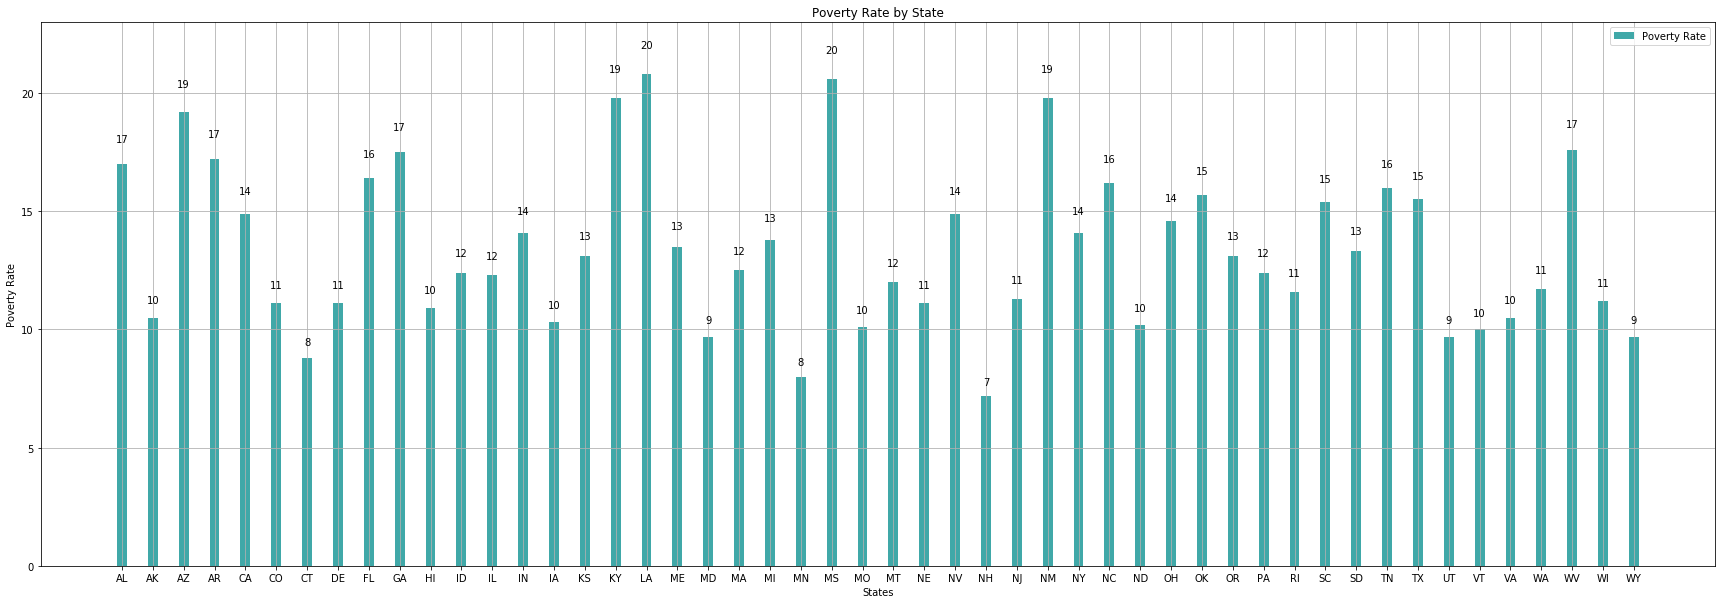

In [33]:
#Construct a BAR Chart that would represent Poverty Rate against each state.

povertyByState = heartPovertyDF['Poverty%']
fig3, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x=x_axis, height=povertyByState, width=width, align='edge', alpha=0.75, color = 'DarkCyan')

ax.set_xlabel('States')
ax.set_ylabel('Poverty Rate')
ax.set_title('Poverty Rate by State')
ax.set_xticks(x_axis+width/2)
ax.set_xticklabels(labels=states)
ax.legend(['Poverty Rate'])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.05 * height, '%d' %int(height), ha='center', va='bottom')
    
autolabel(rects1)
plt.savefig('Images/Poverty.png')
plt.ylim(0, 23)
plt.grid()

plt.show()

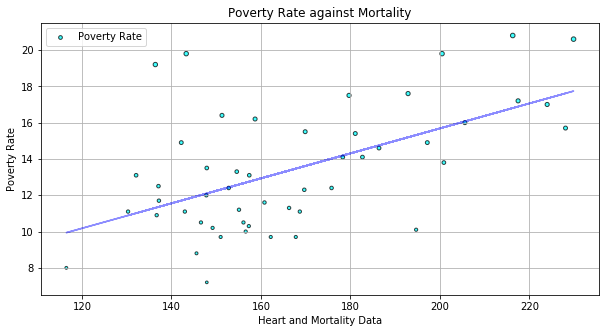

In [40]:
#Construct a Scatter Plot between Poverty and Heart Data

fig4, ax = plt.subplots(figsize=(10, 5))

ax.scatter(x=totalHDByState, y=povertyByState, s=povertyByState, alpha=0.75, edgecolors='black', facecolors='cyan',
          label='Poverty Rate')
ax.set_xlabel('Heart and Mortality Data')
ax.set_ylabel('Poverty Rate')
ax.set_title('Poverty Rate against Mortality')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

p1 = np.polyfit(totalHDByState, povertyByState, 1)
plt.plot(totalHDByState, np.polyval(p1, totalHDByState), color='b', alpha=0.45)
plt.savefig("Images/Poverty.png")
plt.grid()
plt.show()
